<a href="https://colab.research.google.com/github/JonathanCecil01/OfficePlacementM7/blob/main/RFID_MaxRSSI_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import math
import csv
from copy import deepcopy
import matplotlib.pyplot as plt

In [ ]:
def write_data(ls):
  with open('Predictions2.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(ls)

In [ ]:
def read_data():
    landmarks = []
    with open('/content/drive/MyDrive/Colab Notebooks/Active_Landmarks.csv', 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            landmarks.append(row)
    file.close()
    for landmark in landmarks:
        landmark[1] = float(landmark[1])
        landmark[2] = float(landmark[2])
    start = landmarks[0][2]
    products = []


    with open('/content/drive/MyDrive/Colab Notebooks/Products.csv', 'r') as file1:
        reader = csv.reader(file1)
        for row in reader:
            products.append(row) 
    for product in products:
        product[1] = float(product[1])
        product[2] = float(product[2])
    
    return [products, landmarks]

In [ ]:
def read_data_predict():
    landmarks = []
    with open('/content/drive/MyDrive/Colab Notebooks/Active_Landmarks_predict.csv', 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            landmarks.append(row)
    file.close()
    for landmark in landmarks:
        landmark[1] = float(landmark[1])
        landmark[2] = float(landmark[2])
    start = landmarks[0][2]
    products = []


    with open('/content/drive/MyDrive/Colab Notebooks/Products_predict.csv', 'r') as file1:
        reader = csv.reader(file1)
        for row in reader:
            products.append(row) 
    for product in products:
        product[1] = float(product[1])
        product[2] = float(product[2])
    
    return [products, landmarks]

In [ ]:
data = read_data()
products = data[0]
landmarks = data[1]

In [ ]:
print(len(products))

21445


In [ ]:
landmark_new = []
for i in landmarks:
  if i not in landmark_new:
    landmark_new.append(i)
landmarks = landmark_new

In [ ]:
for i in products:
  i[3] = int(i[3][-1])
print(products[0])

['P161', -73.44847171205717, 810042.0, 0]


In [ ]:
time_stamp_ordered = {}
for landmark in landmarks:
  time_stamp_ordered[landmark[2]] = [[],[]]

for landmark in landmarks:
  time_stamp_ordered[landmark[2]][0].append(landmark)
# print(time_stamp_ordered)

for product in products:
  if product[2] not in time_stamp_ordered.keys():
    continue
  time_stamp_ordered[product[2]][1].append(product)
#print(time_stamp_ordered)

for key in time_stamp_ordered.keys():
  labels = {}
  if len(time_stamp_ordered[key][0])>=8:
    for i in time_stamp_ordered[key][0]:
      labels[i[0]] = -91
    for i in time_stamp_ordered[key][0]:
      if i[1]>labels[i[0]]:
        labels[i[0]] = i[1]
    time_stamp_ordered[key][0] = [[k, labels[k], key] for k in labels.keys()]
    # print(time_stamp_ordered[key][0])


In [ ]:
inputs = []
outputs = []
products_dict = {}
for key in time_stamp_ordered.keys():
  input = [time_stamp_ordered[key][0][i][1] for i in range(0, 8)]
  for j in time_stamp_ordered[key][1]:
    output = [0]*8
    output[j[3]] = 1
    output1 = deepcopy(output)
    input.append(j[1])
    input1 = deepcopy(input)
    inputs.append(input1)
    input.pop(-1)
    outputs.append(output1)
    products_dict[j[0]+str(key)+str(j[1])] = [input1, output1]



In [ ]:
inputs = np.array(inputs)
outputs = np.array(outputs)
# inputs = np.random.shuffle(inputs)
# outputs = np.random.shuffle(outputs)
temp = []
for i in range(0, len(outputs)):
  temp.append([inputs[i], outputs[i]])
print(temp[1])
np.random.shuffle(temp)
print(temp[1])
inputs = []
outputs = []
for i in temp:
  inputs.append(i[0])
  outputs.append(i[1])
inputs = np.array(inputs)
outputs = np.array(outputs)

[array([-91.        , -91.        , -91.        , -91.        ,
       -91.        , -91.        , -91.        , -91.        ,
       -73.44847171]), array([1, 0, 0, 0, 0, 0, 0, 0])]
[array([-91.        , -91.        , -46.09437912, -46.09437912,
       -91.        , -91.        , -91.        , -91.        ,
       -69.62257867]), array([0, 0, 1, 0, 0, 0, 0, 0])]


In [ ]:
import tensorflow as tf
import numpy as np 
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
x_train = inputs[:8000]
x_test = inputs[8000:]
y_train = outputs[:8000]
y_test = outputs[8000:]

In [ ]:
model = keras.Sequential([
    layers.Dense(150, activation='sigmoid', input_shape=(9,)),
    layers.Dense(150, activation='sigmoid'),
    layers.Dense(8, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_split = 0.2)

In [ ]:
history2 = model.evaluate(x_test, y_test)
print('Test Error Rate, Accuracy:', history2)

In [ ]:
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate loss and accuracy
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
history = model.fit(x_train, y_train, batch_size=2000, epochs=1000, validation_split = 0.2)

In [ ]:
history2 = model.evaluate(x_test, y_test)
print('Test Error Rate, Accuracy:', history2)

421/421 [==============================] - 1s 2ms/step - loss: 0.1491 - accuracy: 0.9321
Test Error Rate, Accuracy: [0.1491117924451828, 0.9320937395095825]


421/421 [==============================] - 1s 1ms/step


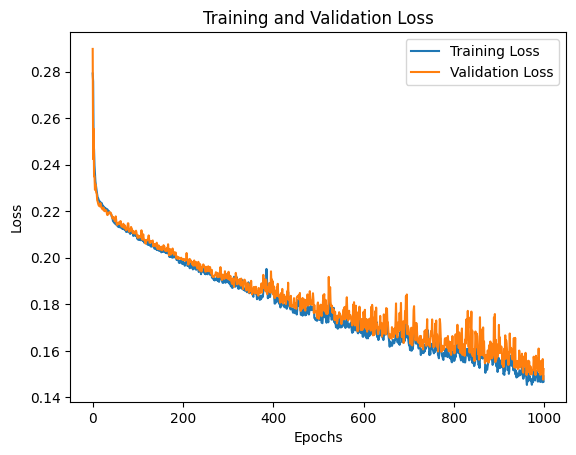

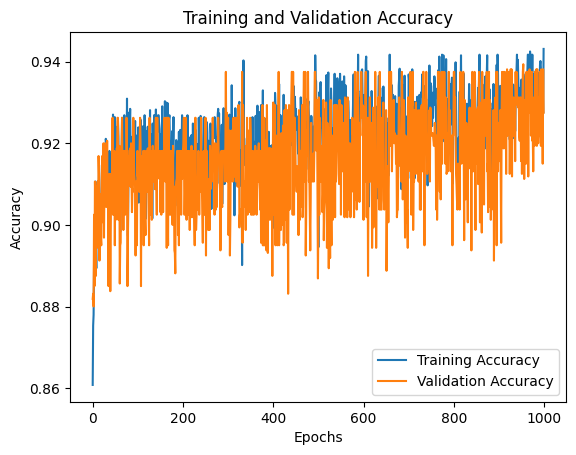

In [ ]:
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate loss and accuracy
#test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

PREDICTION

In [ ]:
data = read_data_predict()
products = data[0]
landmarks = data[1]
print(len(products))
landmark_new = []
for i in landmarks:
  if i not in landmark_new:
    landmark_new.append(i)
landmarks = landmark_new


In [ ]:
time_stamp_ordered = {}
for landmark in landmarks:
  time_stamp_ordered[landmark[2]] = [[],[]]

for landmark in landmarks:
  time_stamp_ordered[landmark[2]][0].append(landmark)
#print(time_stamp_ordered)

for product in products:
  # if product[2] not in time_stamp_ordered.keys():
  #   continue
  time_stamp_ordered[product[2]][1].append(product)
print(time_stamp_ordered)

for key in time_stamp_ordered.keys():
  labels = {}
  if len(time_stamp_ordered[key][0])>=8:
    for i in time_stamp_ordered[key][0]:
      labels[i[0]] = -91
    for i in time_stamp_ordered[key][0]:
      if i[1]>labels[i[0]]:
        labels[i[0]] = i[1]
    time_stamp_ordered[key][0] = [[k, labels[k], key] for k in labels.keys()]
    # print(time_stamp_ordered[key][0])
inputs = []
products_dict = []
for key in time_stamp_ordered.keys():
  input = [time_stamp_ordered[key][0][i][1] for i in range(0, 8)]
  for j in time_stamp_ordered[key][1]:
    input.append(j[1])
    input1 = deepcopy(input)
    inputs.append(input1)
    input.pop(-1)
    products_dict.append([j[0],j[-1], input1])
inputs = np.array(inputs)
print(len(products_dict))

In [ ]:
y_pred = model.predict(inputs)


In [ ]:
y_pred = y_pred.tolist()

In [ ]:
predicted_landmarks = []
for y in y_pred:
  landmark = "L"+str(y.index(max(y)))
  predicted_landmarks.append(landmark)

for i in range(len(products_dict)):
  products_dict[i].append(predicted_landmarks[i])
  #print(products_dict[i])
write_data(products_dict)